In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("steel_strength.csv") 

In [3]:
df.drop("formula",axis = 1,inplace = True)

In [4]:
df.head()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [5]:
df.isna().sum()

c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

In [6]:
df = df.dropna()

# EDA

In [7]:
print(len(df))
print(df.nunique())

303
c                    36
mn                   48
si                   53
cr                  151
ni                  143
mo                  117
v                    43
n                    11
nb                   14
co                  112
w                    15
al                   70
ti                   75
yield strength      264
tensile strength    271
elongation           98
dtype: int64


In [8]:
df.corr()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
c,1.000000,0.019289,-0.000129,0.244693,-0.653122,0.141882,0.320995,0.079718,0.102967,0.427638,0.075921,-0.410469,-0.411507,0.158619,0.499577,-0.280106
mn,0.019289,1.000000,0.019767,0.218600,-0.125491,-0.141065,-0.056831,0.096855,-0.025155,-0.174289,0.053970,-0.020590,-0.157038,-0.167910,-0.130578,0.015882
si,-0.000129,0.019767,1.000000,0.043105,0.014332,-0.340069,-0.109980,-0.035381,-0.015448,-0.030292,-0.032835,-0.169383,-0.165280,-0.125637,-0.067181,-0.030027
cr,0.244693,0.218600,0.043105,1.000000,-0.820698,-0.016560,-0.120898,0.336446,-0.066724,0.126666,0.048799,0.088262,-0.625111,-0.418500,-0.089349,0.124593
ni,-0.653122,-0.125491,0.014332,-0.820698,1.000000,-0.189077,-0.074638,-0.350331,-0.015626,-0.416730,-0.122009,0.213482,0.658306,0.250488,-0.203213,0.052167
mo,0.141882,-0.141065,-0.340069,-0.016560,-0.189077,1.000000,0.126988,0.286735,-0.000171,0.159225,-0.206220,0.022977,0.027082,0.087743,0.239799,-0.166318
v,0.320995,-0.056831,-0.109980,-0.120898,-0.074638,0.126988,1.000000,0.066965,0.239188,0.034808,0.034669,-0.178801,0.017338,0.206400,0.255433,-0.278356
n,0.079718,0.096855,-0.035381,0.336446,-0.350331,0.286735,0.066965,1.000000,-0.027666,0.195249,0.047967,-0.151710,-0.164575,-0.112225,0.182131,-0.170990
nb,0.102967,-0.025155,-0.015448,-0.066724,-0.015626,-0.000171,0.239188,-0.027666,1.000000,-0.019591,-0.029409,-0.065725,0.018105,0.035834,0.050950,-0.057321
co,0.427638,-0.174289,-0.030292,0.126666,-0.416730,0.159225,0.034808,0.195249,-0.019591,1.000000,0.018487,-0.421356,-0.140610,0.188016,0.538325,-0.045318


<AxesSubplot:>

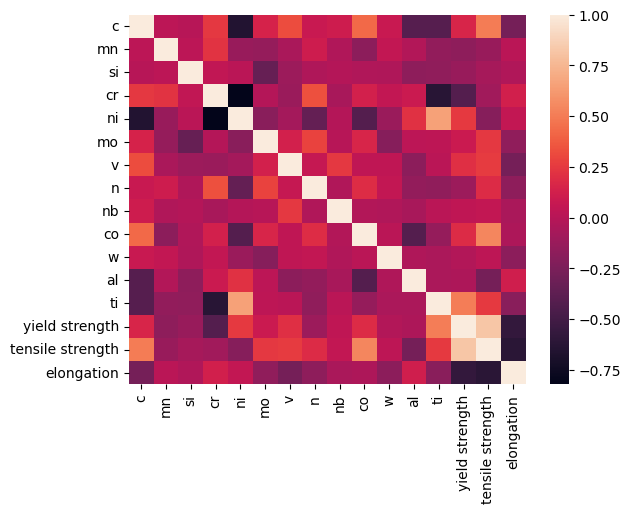

In [9]:
sns.heatmap(df.corr())

In [10]:
X = df.drop(["yield strength","tensile strength","elongation"],axis = 1)

In [11]:
y1 = df[["yield strength"]]
y2 = df[["tensile strength"]]
y3 = df[["elongation"]]


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y1_train,y1_test,y2_train,y2_test,y3_train,y3_test = train_test_split(X,y1,y2,y3,train_size = 0.8)


# Model1 - yield Strength
# Model2 - tensile Strength
# Model3 - Elongation


# Random Forest Regressor

28669.17357859933


Text(0, 0.5, 'Fitted')

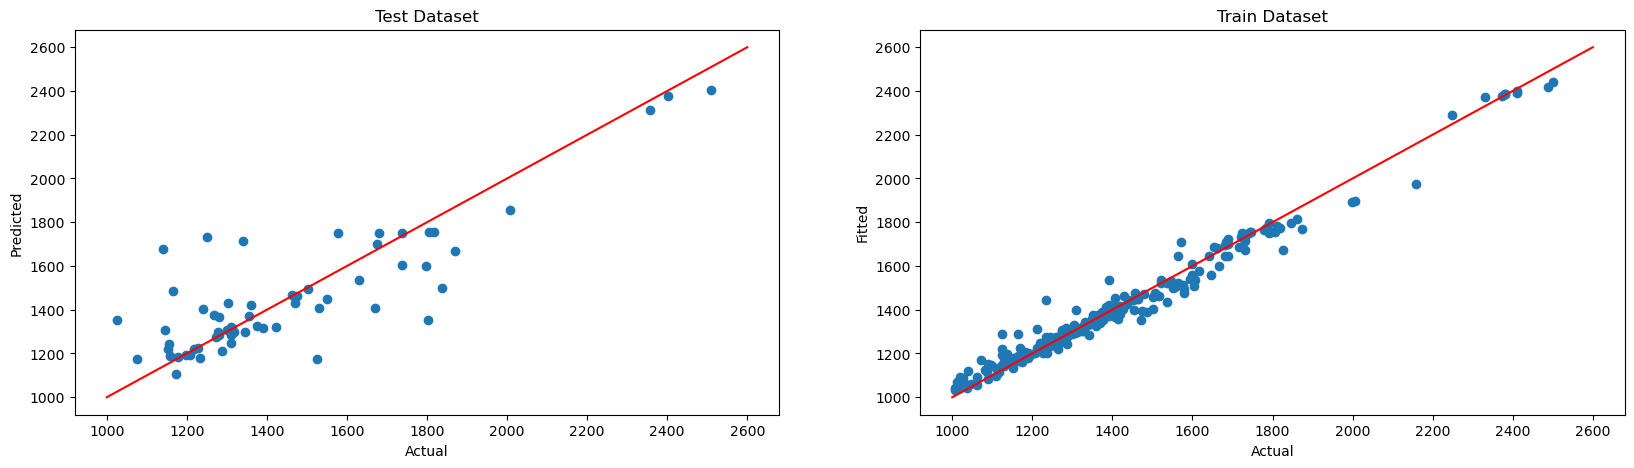

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators = 500)
model1.fit(X_train,y1_train)
pred1 = model1.predict(X_test)
print(mean_squared_error(pred1,y1_test))
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.scatter(y1_test,pred1)
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Test Dataset")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(122)
plt.scatter(y1_train,model1.predict(X_train))
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Train Dataset")
plt.xlabel("Actual")
plt.ylabel("Fitted")


39941.68400949942


Text(0, 0.5, 'Fitted')

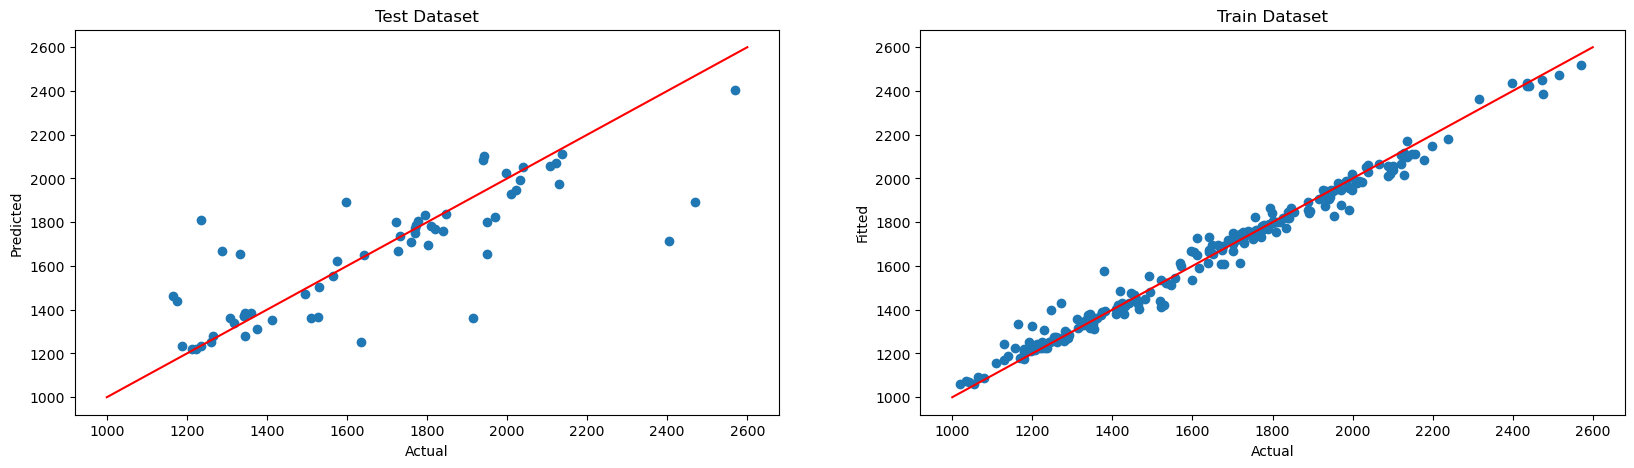

In [14]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 500)
model2.fit(X_train,y2_train)
pred2 = model2.predict(X_test)
print(mean_squared_error(pred2,y2_test))
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.scatter(y2_test,pred2)
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Test Dataset")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(122)
plt.scatter(y2_train,model2.predict(X_train))
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Train Dataset")
plt.xlabel("Actual")
plt.ylabel("Fitted")

23.676216803278685


Text(0, 0.5, 'Fitted')

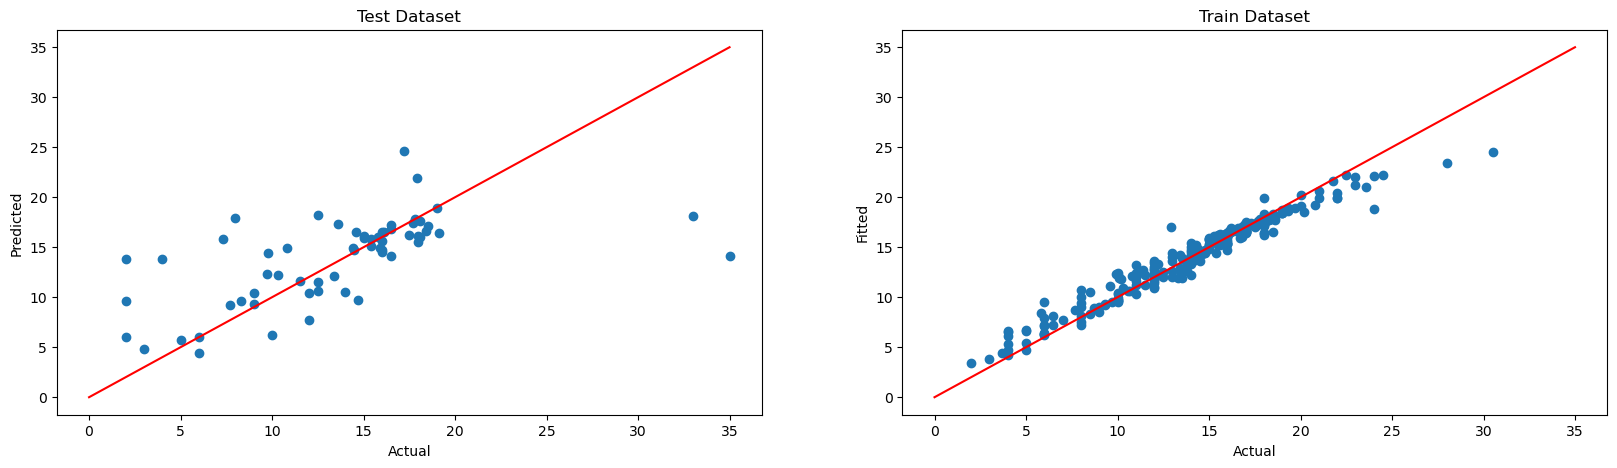

In [15]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators = 500)
model3.fit(X_train,y3_train)
pred3 = model3.predict(X_test)
print(mean_squared_error(pred3,y3_test))
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.scatter(y3_test,pred3)
plt.plot([0,35],[0,35],c = 'r' )
plt.title("Test Dataset")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(122)
plt.scatter(y3_train,model3.predict(X_train))
plt.plot([0,35],[0,35],c = 'r' )
plt.title("Train Dataset")
plt.xlabel("Actual")
plt.ylabel("Fitted")

# Neural Network



74558.87557886844


Text(0, 0.5, 'Fitted')

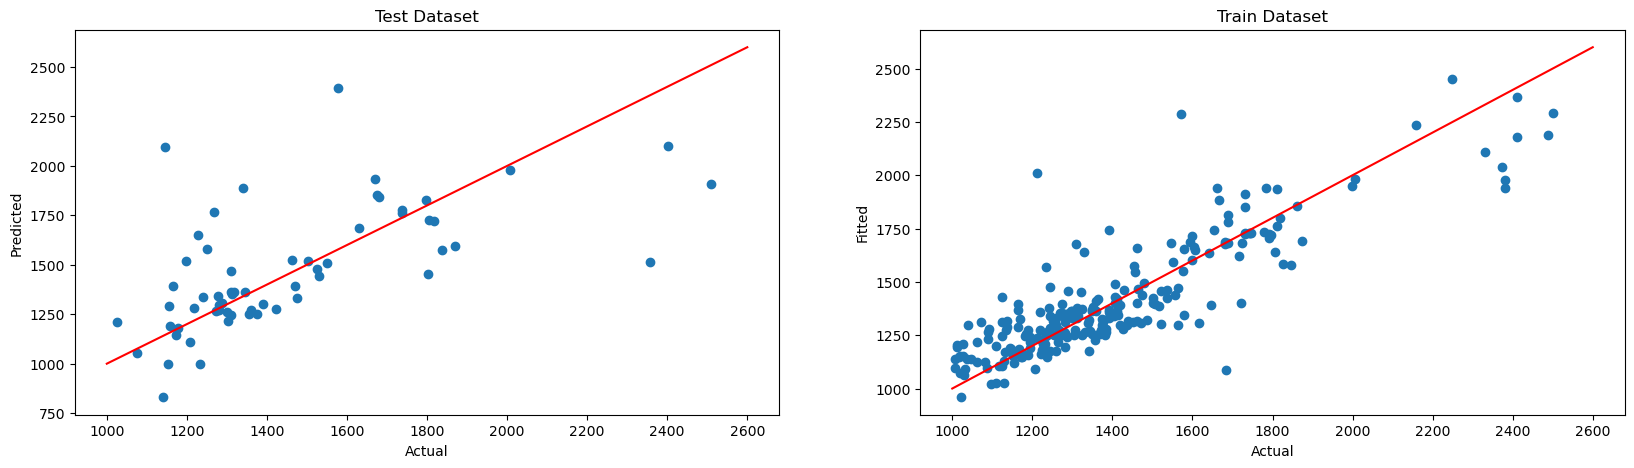

In [16]:
from sklearn.neural_network  import MLPRegressor
model1 = MLPRegressor(hidden_layer_sizes=[100,100,100],max_iter= 1000)
model1.fit(X_train,y1_train)
pred1 = model1.predict(X_test)
print(mean_squared_error(pred1,y1_test))
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.scatter(y1_test,pred1)
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Test Dataset")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(122)
plt.scatter(y1_train,model1.predict(X_train))
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Train Dataset")
plt.xlabel("Actual")
plt.ylabel("Fitted")

57152.52775411106


Text(0, 0.5, 'Fitted')

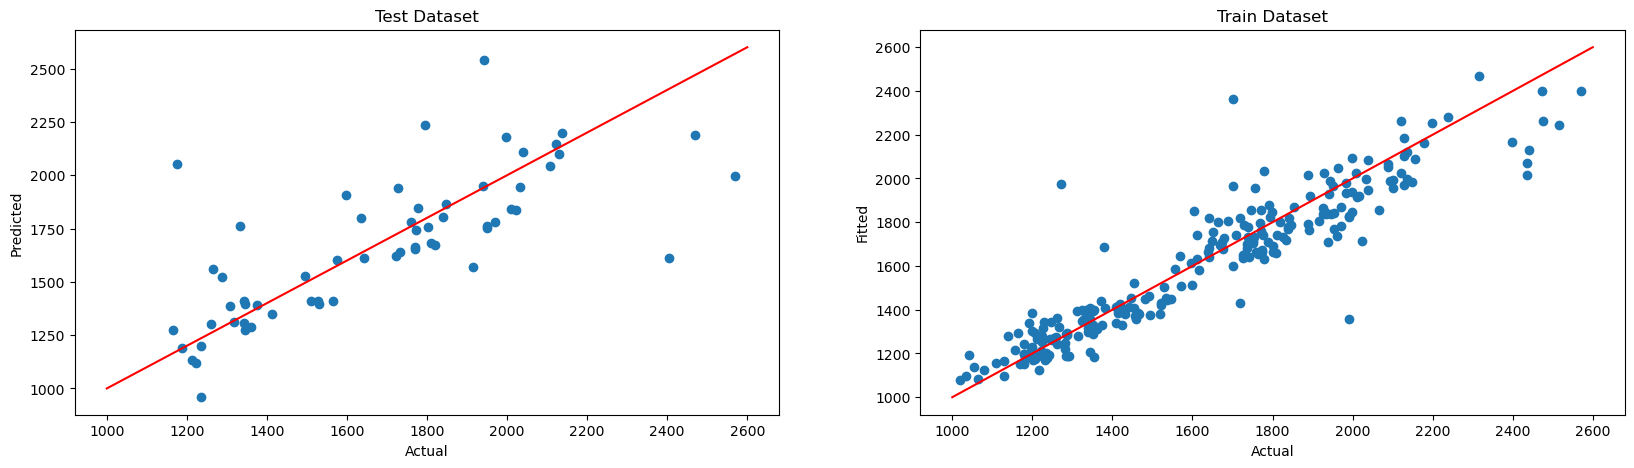

In [17]:
from sklearn.neural_network  import MLPRegressor
model2 = MLPRegressor(hidden_layer_sizes=[100,100,50],max_iter= 1000)
model2.fit(X_train,y2_train)
pred2 = model2.predict(X_test)
print(mean_squared_error(pred2,y2_test))
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.scatter(y2_test,pred2)
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Test Dataset")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(122)
plt.scatter(y2_train,model2.predict(X_train))
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Train Dataset")
plt.xlabel("Actual")
plt.ylabel("Fitted")

2845011.934365151


Text(0, 0.5, 'Fitted')

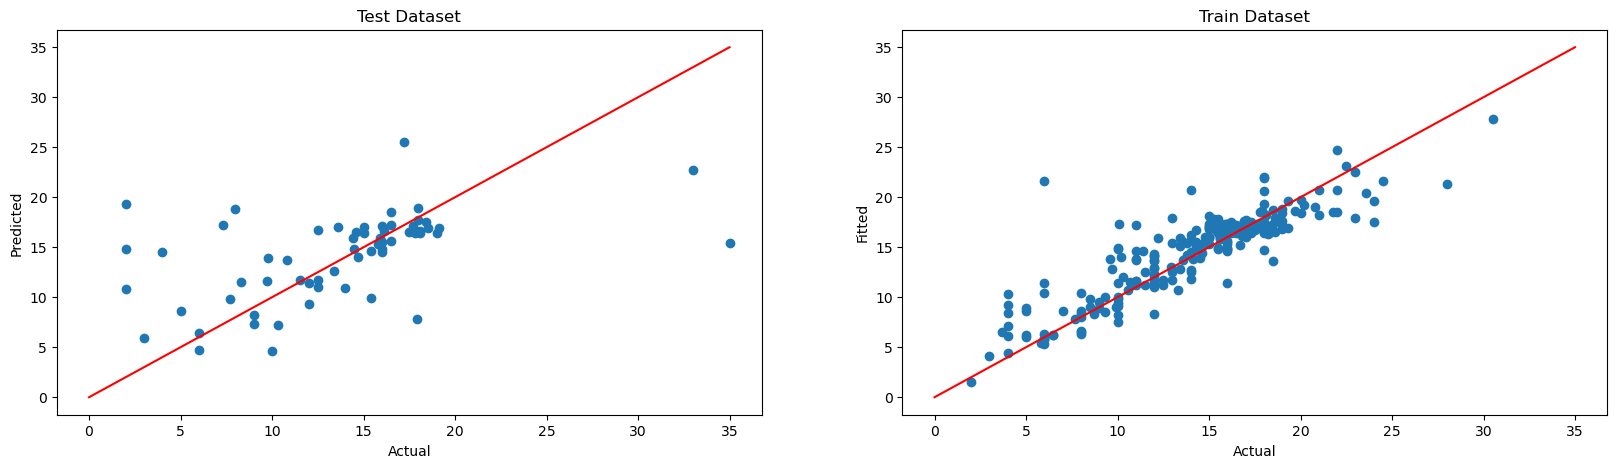

In [18]:
from sklearn.neural_network  import MLPRegressor
model3 = MLPRegressor(hidden_layer_sizes=[100,100,100],max_iter= 1000)
model3.fit(X_train,y3_train)
pred3 = model3.predict(X_test)
print(mean_squared_error(pred2,y3_test))
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.scatter(y3_test,pred3)
plt.plot([0,35],[0,35],c = 'r')
plt.title("Test Dataset")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(122)
plt.scatter(y3_train,model3.predict(X_train))
plt.plot([0,35],[0,35],c = 'r')
plt.title("Train Dataset")
plt.xlabel("Actual")
plt.ylabel("Fitted")

# KNN

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

34483.34092896176


Text(0, 0.5, 'Fitted')

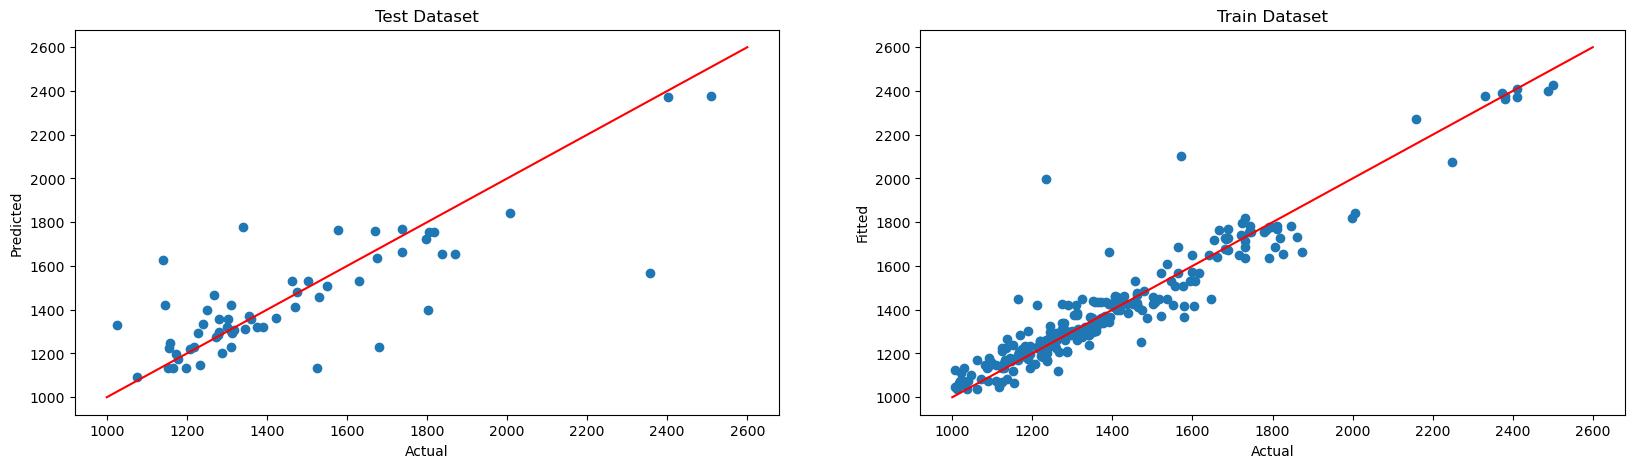

In [20]:
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor(n_neighbors = 3)

model1.fit(X_train,y1_train)
pred1 = model1.predict(X_test)
print(mean_squared_error(pred1,y1_test))
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.scatter(y1_test,pred1)
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Test Dataset")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(122)
plt.scatter(y1_train,model1.predict(X_train))
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Train Dataset")
plt.xlabel("Actual")
plt.ylabel("Fitted")

38816.235245901626


Text(0, 0.5, 'Fitted')

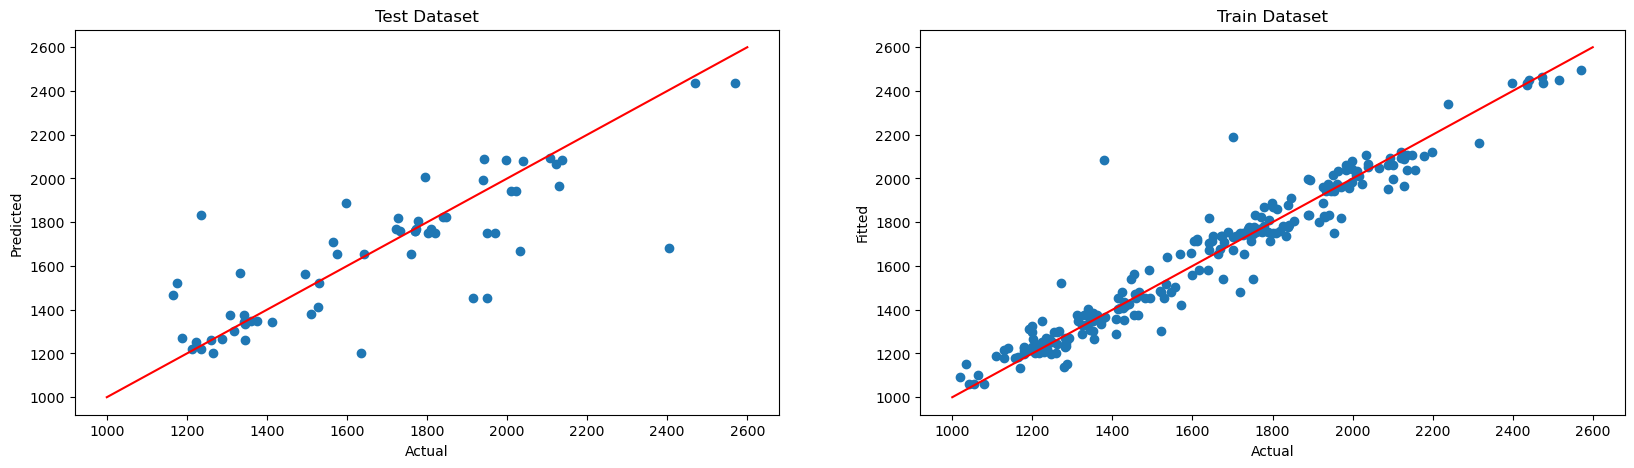

In [21]:

model2 = KNeighborsRegressor(n_neighbors = 3)
model2.fit(X_train,y2_train)
pred2 = model2.predict(X_test)
print(mean_squared_error(pred2,y2_test))
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.scatter(y2_test,pred2)
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Test Dataset")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(122)
plt.scatter(y2_train,model2.predict(X_train))
plt.plot([1000,2600],[1000,2600],c = 'r')
plt.title("Train Dataset")
plt.xlabel("Actual")
plt.ylabel("Fitted")

2798309.6831147536


Text(0, 0.5, 'Fitted')

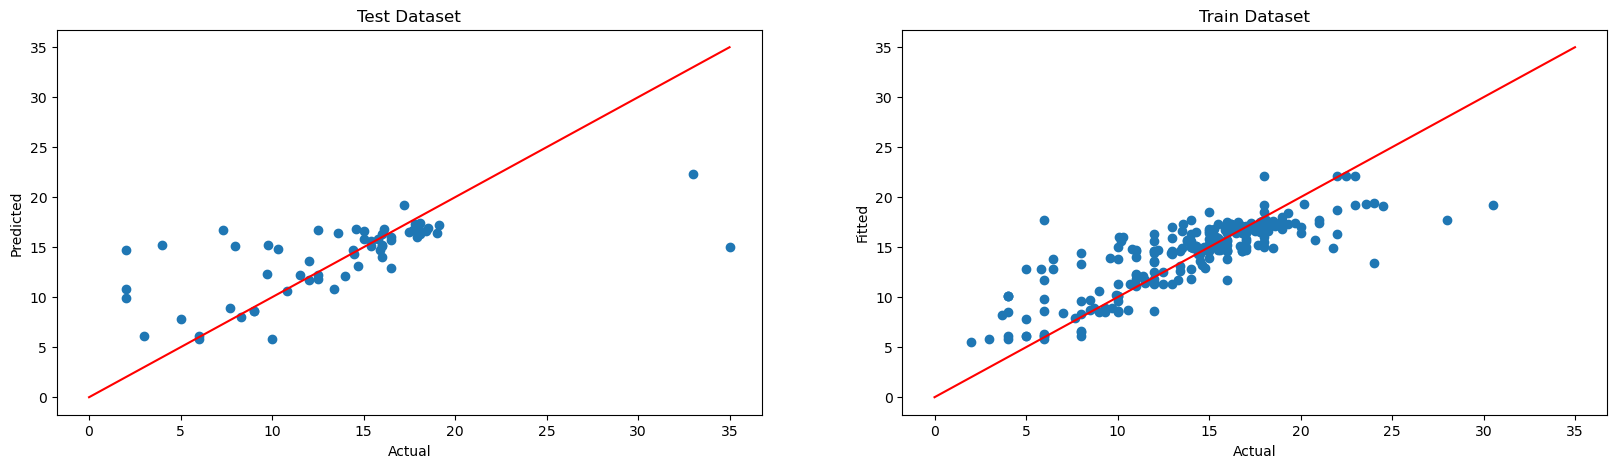

In [22]:
model3 = KNeighborsRegressor(n_neighbors=6)
model3.fit(X_train,y3_train)
pred3 = model3.predict(X_test)
print(mean_squared_error(pred2,y3_test))
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.scatter(y3_test,pred3)
plt.plot([0,35],[0,35],c = 'r')
plt.title("Test Dataset")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(122)
plt.scatter(y3_train,model3.predict(X_train))
plt.plot([0,35],[0,35],c = 'r')
plt.title("Train Dataset")
plt.xlabel("Actual")
plt.ylabel("Fitted")